In [2]:
from pathlib import Path  # https://realpython.com/python-pathlib/
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from data_visualization.metrics import get_metrics

In [4]:
project_root = Path.cwd().parent
train_path = project_root.joinpath("dataset", "formatted_train.csv")
val_path = project_root.joinpath("dataset", "formatted_val.csv")
test_path = project_root.joinpath("dataset", "formatted_test.csv")

In [5]:
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Smaller dataset
train_df = train_df.head(100)
val_df = val_df.head(100)
test_df = test_df.head(100)

In [6]:
from models.bow_models import create_count_vector, train_bow_lr

# Train model
cv = create_count_vector(train_df)
#bow_mlp_model = train_bow_mlp(train_df, cv)
bow_lr_model = train_bow_lr(train_df, cv)

In [7]:
from models.bow_models import format_df_to_bow

x_test, y_test = format_df_to_bow(cv, test_df)

In [10]:
predicted_labels = bow_lr_model.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print(conf_matrix)

[[23 25]
 [10 42]]


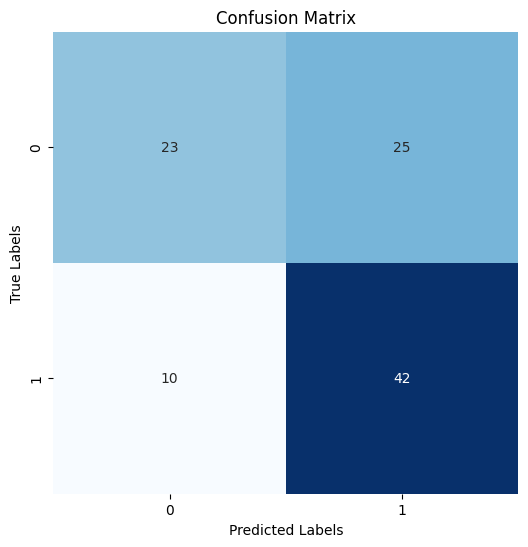

In [17]:
from data_visualization.metrics import graphical_confusion_matrix
save_dir = project_root.joinpath("metrics", "bow_lr_100")
Path(save_dir).mkdir(parents=True, exist_ok=True)
graphical_confusion_matrix(conf_matrix, save_dir)

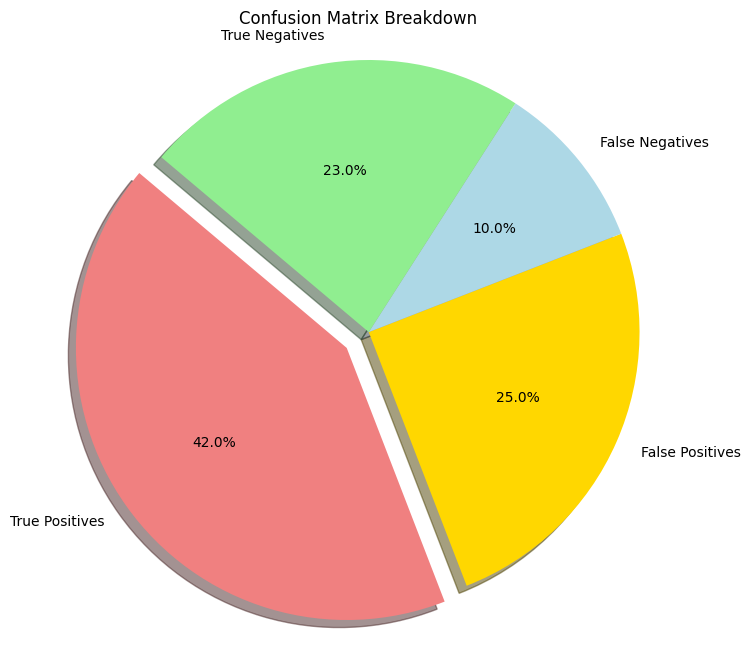

In [21]:
from data_visualization.metrics import pie_chart_confusion_matrix

pie_chart_confusion_matrix(conf_matrix, save_dir)

In [33]:
from sklearn.metrics import accuracy_score, f1_score
test_df.head()

accuracy = accuracy_score(test_df["sentiment"], predicted_labels)
f1 = f1_score(test_df["sentiment"], predicted_labels, average='binary', pos_label="positive")
# negative = 0.5679012345679013
print(f1)

0.7058823529411765


In [29]:
test_df["sentiment"]

0     negative
1     positive
2     negative
3     negative
4     negative
        ...   
95    negative
96    negative
97    negative
98    negative
99    negative
Name: sentiment, Length: 100, dtype: object

In [18]:
get_metrics(bow_lr_model, x_test, y_test, project_root.joinpath("metrics", "bow_lr_100"))

ValueError: pos_label=1 is not a valid label. It should be one of ['negative', 'positive']